<a href="https://colab.research.google.com/github/arjunparmar/VIRTUON/blob/main/Rupanshu/Pose_detection_by_body_pix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tf-bodypix[all]

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import random
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Input
from tensorflow.keras.models import Sequential, Model
import matplotlib.pyplot as plt
%matplotlib inline

from tf_bodypix.api import download_model, load_model, BodyPixModelPaths


In [ ]:
from tf_bodypix.api import download_model, load_model, BodyPixModelPaths

In [129]:
 test_img1 = '/content/drive/MyDrive/WhatsApp Image 2021-01-02 at 3.35.47 PM.jpeg'
 test_img2 = '/content/drive/MyDrive/0009.jpg'
 test_img3 = '/content/drive/MyDrive/0012.jpg'

In [141]:
bodypix_model = load_model(download_model(BodyPixModelPaths.MOBILENET_FLOAT_50_STRIDE_16))

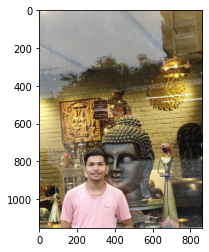

In [ ]:
image1 = tf.keras.preprocessing.image.load_img( test_img1)
image1.show()
plt.imshow(image1);

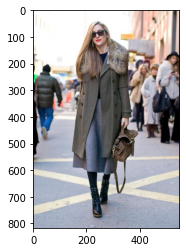

In [123]:
image2 = tf.keras.preprocessing.image.load_img( test_img2)
image2.show()
plt.imshow(image2);

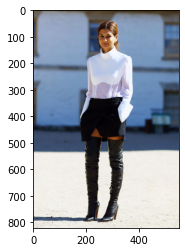

In [130]:
image3 = tf.keras.preprocessing.image.load_img( test_img3)
image3.show()
plt.imshow(image3);

In [136]:
# image converted to image array
image_array1 = tf.keras.preprocessing.image.img_to_array(image1)
# bodypix prediction
result = bodypix_model.predict_single(image_array1)
image_array1.shape

(1152, 864, 3)

In [137]:
# image converted to image array
image_array2 = tf.keras.preprocessing.image.img_to_array(image2)
# bodypix prediction
result = bodypix_model.predict_single(image_array2)
image_array2.shape

(817, 550, 3)

In [138]:
# image converted to image array
image_array3 = tf.keras.preprocessing.image.img_to_array(image3)
# bodypix prediction
result = bodypix_model.predict_single(image_array3)
image_array3.shape

(821, 550, 3)

In [ ]:
mask1 = result.get_mask(threshold=0.75)
tf.keras.preprocessing.image.save_img('bodypix-mask.jpg',mask1)

In [125]:
mask2 = result.get_mask(threshold=0.75)
tf.keras.preprocessing.image.save_img('bodypix-mask.jpg',mask2)

In [133]:
mask3 = result.get_mask(threshold=0.75)
tf.keras.preprocessing.image.save_img('bodypix-mask.jpg',mask3)

In [ ]:
colored_mask1 = result.get_colored_part_mask(mask1)
tf.keras.preprocessing.image.save_img('bodypix-colored-mask.jpg',colored_mask1)

In [126]:
colored_mask2 = result.get_colored_part_mask(mask2)
tf.keras.preprocessing.image.save_img('bodypix-colored-mask.jpg',colored_mask2)

In [134]:
colored_mask3 = result.get_colored_part_mask(mask3)
tf.keras.preprocessing.image.save_img('bodypix-colored-mask.jpg',colored_mask3)

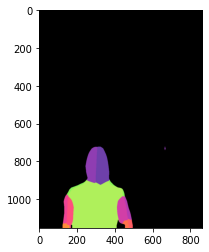

In [128]:
plt.imshow(colored_mask1)
plt.show()
plt.imsave('colored_mask.jpg', colored_mask1.astype(np.uint8))

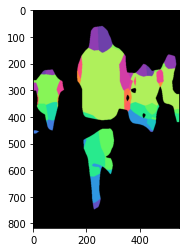

In [127]:
plt.imshow(colored_mask2)
plt.show()
plt.imsave('colored_mask.jpg', colored_mask2.astype(np.uint8))

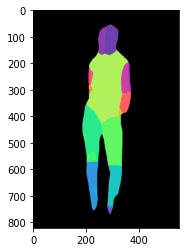

In [135]:
plt.imshow(colored_mask3)
plt.show()
plt.imsave('colored_mask.jpg', colored_mask3.astype(np.uint8))